In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving metadata.csv to metadata.csv


In [ ]:
import zipfile
import os
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/datasets/covid_data.zip', 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
print(len(os.listdir('/tmp/Data/test/COVID19')))
print(len(os.listdir('/tmp/Data/test/NORMAL')))
print(len(os.listdir('/tmp/Data/test/PNEUMONIA')))

print(len(os.listdir('/tmp/Data/train/COVID19')))
print(len(os.listdir('/tmp/Data/train/NORMAL')))
print(len(os.listdir('/tmp/Data/train/PNEUMONIA')))

116
317
855
460
1266
3418


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir = '/tmp/Data/train'
test_dir = '/tmp/Data/test'

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255, #normalize pixel vals to [0,1]
    rotation_range = 20, #rotate image rand within 20 deg
    width_shift_range = 0.2, #shift image horizontally within 20% of width
    height_shift_range = 0.2, #shift image horizontally within 20% of height
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True, # Flip image horizontally
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir, # Path to training data
    target_size=(150, 150), # Resize images to 150x150
    batch_size=32, # Number of images to read at once
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir, # Path to test data
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


In [ ]:
# Define the CNN architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax') # Output layer with 3 nodes and softmax activation
])

In [ ]:
checkpoint_path = "/content/drive/MyDrive/checkpoints/cp-epoch-{epoch}.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator, epochs=50, validation_data=test_generator,callbacks=[cp_callback])

Epoch 1/50
161/161 [==============================] - ETA: 0s - loss: 0.3350 - accuracy: 0.8690
Epoch 1: saving model to /content/drive/MyDrive/checkpoints/cp-epoch-1.ckpt
161/161 [==============================] - 178s 1s/step - loss: 0.3350 - accuracy: 0.8690 - val_loss: 0.2991 - val_accuracy: 0.8828
Epoch 2/50
161/161 [==============================] - ETA: 0s - loss: 0.3140 - accuracy: 0.8787
Epoch 2: saving model to /content/drive/MyDrive/checkpoints/cp-epoch-2.ckpt
161/161 [==============================] - 171s 1s/step - loss: 0.3140 - accuracy: 0.8787 - val_loss: 0.2174 - val_accuracy: 0.9224
Epoch 3/50
161/161 [==============================] - ETA: 0s - loss: 0.3035 - accuracy: 0.8767
Epoch 3: saving model to /content/drive/MyDrive/checkpoints/cp-epoch-3.ckpt
161/161 [==============================] - 169s 1s/step - loss: 0.3035 - accuracy: 0.8767 - val_loss: 0.2241 - val_accuracy: 0.9293
Epoch 4/50
161/161 [==============================] - ETA: 0s - loss: 0.3005 - accuracy:

In [ ]:
'''
# to resume from epoch 5 checkpoints
model.load_weights("/content/drive/MyDrive/checkpoints/cp-epoch-5.ckpt")

history = model.fit(train_generator, epochs=50, validation_data=test_generator,
          callbacks=[cp_callback])
'''

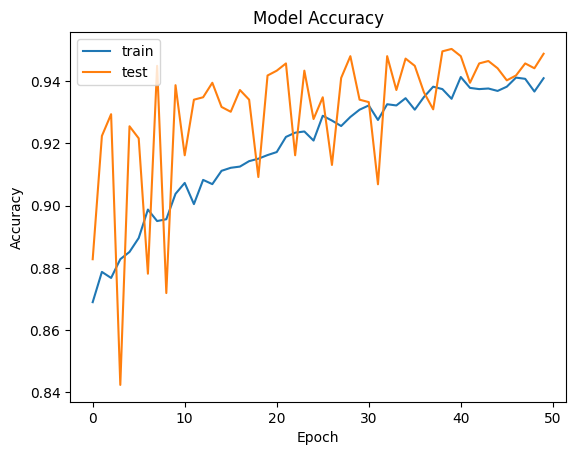

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy and loss curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
score = model.evaluate(test_generator)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

41/41 [==============================] - 28s 672ms/step - loss: 0.1527 - accuracy: 0.9488
Test Loss: 0.1527436077594757
Test Accuracy: 0.9487577676773071


In [ ]:
model.save('/content/drive/MyDrive/models/CNN_model.h5')